In [1]:
import sys
sys.path.append("../src") 
sys.path.append("../data") 


import SDE_class as sde
import importlib
importlib.reload(sde)
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import util as util
importlib.reload(util)

<module 'util' from '../src/util.py'>

#
term: 満期時刻　step:一度に進む幅　init:初期値

In [2]:
term=1
step=0.0001
init=np.array([0.])

In [3]:
mymodel = sde.SDE_Markov(mymat=np.array([[0.]]), myvar =np.array([[1.]]),myinit=np.array([1.]),myscale=1.,myterm=term,step_size=step)

In [4]:
one_step = mymodel.one_step(now_position=np.array([1]))
print(one_step)

[[ 1.0109901]]


In [5]:
many_step = mymodel.many_step(now_position=np.array([1]))

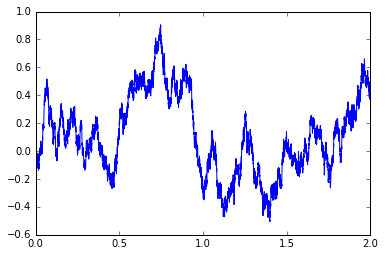

In [6]:
terminal=2
step_size=0.0001
init=np.array([0.])
util.simulate("brown_mortion",terminal,step_size,init)

In [7]:
unkoTraj = np.load("../data/unko.npy") 

In [8]:
term=40
step=0.5

In [9]:
mymodel = sde.SDE_Markov(mymat=np.array([[0.]]), myvar =np.array([[1.]]),myinit=np.array([1.]),myscale=1.,myterm=term,step_size=step)

In [10]:
div=int(term/step)
random_box=np.zeros(div)
for k in range(div):
    value=mymodel.many_step(now_position=np.array([0]))
    random_box[k]=value[0,div-1]
terminal_mean=np.mean(random_box)
terminal_var=np.var(random_box)
print(terminal_mean)#初期値
print(terminal_var)#time^2*myvar^2*myscale

0.0442619579531
49.5458997812


array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])